In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np 

plt.rcParams["figure.figsize"] = [10, 7]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

data = pd.read_pickle('./data/scenario_2_demand.p')
data.head()


new_households_per_1k_units_per_step  Run  \
202                                    16  202   
214                                    16  214   
196                                    15  196   
211                                    16  211   
191                                    15  191   

                                              arrivals  \
202           id       budget  arrived at step  uni...   
214           id       budget  arrived at step  uni...   
196           id       budget  arrived at step  uni...   
211           id       budget  arrived at step  uni...   
191           id        budget  arrived at step  un...   

                                            departures  \
202          id       budget  departed at step  uni...   
214          id        budget  departed at step  un...   
196          id       budget  departed at step  uni...   
211          id        budget  departed at step  un...   
191          id       budget  departed at step  uni...   

                                housing unit ownership  \
202        step  unit id                           ...   
214        step  unit id                           ...   
196        step  unit id                           ...   
211        step  unit id                           ...   
191        step  unit id                           ...   

                                        neighbourhoods  rental transactions  \
202      id        neighbourhood  \
0   52         ...                  145   
214      id        neighbourhood  \
0   26  Wata el...                  141   
196      id     neighbourhood                      ...                  115   
211      id    neighbourhood                       ...                   65   
191      id     neighbourhood                      ...                   99   

                                               rentals  \
202       unit_id  area         price  steps_in_mar...   
214       unit_id  area         price  steps_in_mar...   
196       unit_id  area         price  steps_in_mar...   
211      unit_id  area        price  steps_in_marke...   
191      unit_id  area        price  steps_in_marke...   

                                             residents  sale transactions  \
202           id  step        budget      home  ten...               1152   
214           id  step       budget      home  tenu...               1177   
196           id  step       budget      home tenur...               1143   
211           id  step        budget      home tenu...               1169   
191           id  step       budget      home tenur...               1118   

                                                 sales  unhoused tenants  \
202        unit_id  area          price  steps_in_m...               155   
214        unit_id  area          price  steps_in_m...               173   
196        unit_id  area          price  steps_in_m...               168   
211        unit_id  area          price  steps_in_m...               159   
191        unit_id  area          price  steps_in_m...               151   

     vacancy (for rent)  vacancy (for sale)  vacancy (off market)  \
202            0.004238            0.070757              0.044039   
214            0.002395            0.064308              0.057122   
196            0.005344            0.069099              0.054911   
211            0.000000            0.070573              0.062465   
191            0.006818            0.073706              0.053437   

     vacancy total  tax_rate_property  tax_rate_transfer  \
202       0.119034               0.01               0.01   
214       0.123825               0.01               0.01   
196       0.129353               0.01               0.01   
211       0.133039               0.01               0.01   
191       0.133960               0.01               0.01   

                                   file  central_bank_interest_rate  \
202  ../../neighbourhoods_clean.geojson                         0.

In [2]:
data['vacancy (for rent)'] = data['vacancy (for rent)'] * 100
data['vacancy (for sale)'] = data['vacancy (for sale)'] * 100
data['vacancy (off market)'] = data['vacancy (off market)'] * 100
data['vacancy total'] = data['vacancy total'] * 100
data['tax_rate_vacancy'] = data['tax_rate_vacancy'] * 100


In [3]:
corr = np.corrcoef(data['new_households_per_1k_units_per_step'], data['vacancy total'])

corr_ = corr[0][1]

In [4]:
data[['vacancy (for rent)', 'vacancy (for sale)', 'vacancy (off market)', 'vacancy total']].describe().round(decimals=3)


vacancy (for rent)  vacancy (for sale)  vacancy (off market)  \
count             220.000             220.000               220.000   
mean                0.085              15.385                 4.661   
std                 0.243               4.936                 1.092   
min                 0.000               6.431                 2.193   
25%                 0.000              11.070                 4.012   
50%                 0.000              15.156                 4.726   
75%                 0.000              19.426                 5.404   
max                 1.382              25.686                 7.168   

       vacancy total  
count        220.000  
mean          20.131  
std            4.159  
min           11.903  
25%           16.317  
50%           20.158  
75%           23.618  
max           28.119

 
-1.286 x + 34.27


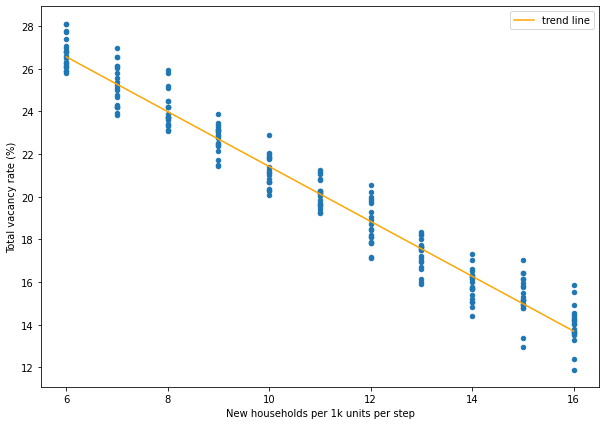

In [5]:
data.plot.scatter(x='new_households_per_1k_units_per_step', y='vacancy total', legend=True)

trend = np.polyfit(data['new_households_per_1k_units_per_step'], data['vacancy total'], 1)

trend_line = np.poly1d(trend)
print(trend_line)
plt.plot(data['new_households_per_1k_units_per_step'], trend_line(data['new_households_per_1k_units_per_step']), label='trend line', color='orange')

#plt.axhline(y=23, c='r', label='Initial vacancy rate')
plt.xlabel('New households per 1k units per step')
plt.ylabel('Total vacancy rate (%)')
plt.legend()


Text(0, 0.5, 'Total vacancy rate')

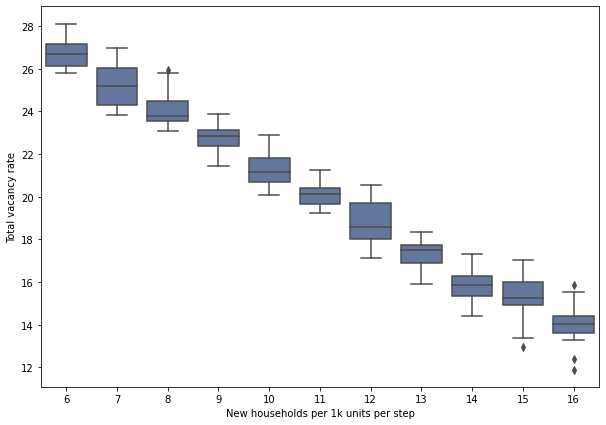

In [6]:
import seaborn as sns

ax = sns.boxplot(x='new_households_per_1k_units_per_step', y='vacancy total', data=data, color='#5975a4')

plt.xlabel('New households per 1k units per step')
plt.ylabel('Total vacancy rate')


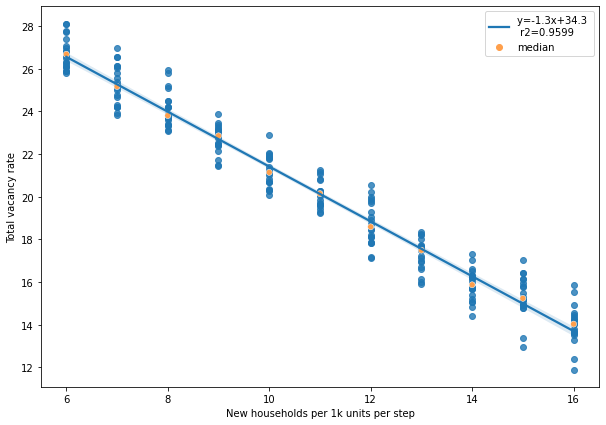

In [7]:
ax = sns.regplot(x='new_households_per_1k_units_per_step', y='vacancy total', data=data, line_kws={'label': 'y={1:.1f}x+{2:.1f} \n r2={0:.4f}'.format(corr_**2, *trend_line.coeffs)})

medians = data.groupby(['new_households_per_1k_units_per_step'])[['vacancy total']].apply(np.median)
med_df = pd.DataFrame(medians)
med_df.rename(columns = {0:'median'}, inplace = True) 
med_df.head()
sns.scatterplot(data=med_df, palette=['#ff9f4b'])

plt.xlabel('New households per 1k units per step')
plt.ylabel('Total vacancy rate')
plt.legend()
plt.xlim(5.5, 16.5)
print()


Text(0.5, 0, 'Vacancy rate')

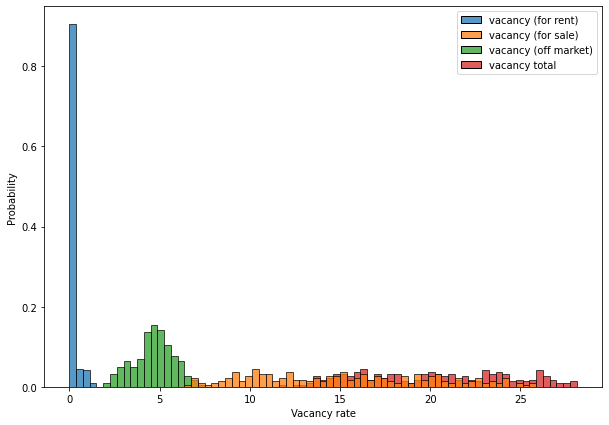

In [8]:
vacancy_df = data[['vacancy (for rent)', 'vacancy (for sale)', 'vacancy (off market)', 'vacancy total']]

vacancy_df.head()

sns.histplot(data=vacancy_df, bins=75, common_norm=False, stat='probability')

plt.xlabel('Vacancy rate')

In [9]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(os.path.dirname(current_dir))
sys.path.insert(0, parent_dir) 

from model import BSRIModel

from mesa.batchrunner import BatchRunner
from agents.investor import InvestorAgent


fixed_params = {
    "tax_rate_property": 0.01,
    "tax_rate_transfer": 0.01,
    "file": '../../neighbourhoods_clean.geojson',
#    "new_households_per_1k_units_per_step": 9.5,
    "central_bank_interest_rate": 0.1,
    "household_units_to_sample": 10,
    "tax_rate_property_vacant": 0.0,
    "tax_rate_vacancy": 0.02,
}
                                      
variable_params = {
    "new_households_per_1k_units_per_step": [7, 13],
}


model_reporters={
    "rental transactions": lambda model: model.transaction_count_rent_cumulative,
    "sale transactions": lambda model: model.transaction_count_sale_cumulative,
    "rentals": lambda model:  model.datacollector.get_table_dataframe('rentals'),
    "sales": lambda model:  model.datacollector.get_table_dataframe('sales'),
    "unhoused tenants": lambda model: len(model.households_without_homes),
    "vacancy total": lambda model: len(model.vacancies)/model.n_housing_units, 
    "vacancy (off market)": lambda model: len([unit for unit in model.vacancies if unit.on_market == 'no' and isinstance(unit.owner, InvestorAgent)])/model.n_housing_units, 
    "vacancy (for sale)": lambda model: len([unit for unit in model.vacancies if unit.on_market == 'sale'])/model.n_housing_units, 
    "vacancy (for rent)": lambda model: len([unit for unit in model.vacancies if unit.on_market == 'rent'])/model.n_housing_units, 
    "arrivals": lambda model: model.datacollector.get_table_dataframe('arrivals'), 
    "residents": lambda model: model.datacollector.get_table_dataframe('residents'), 
    "departures": lambda model: model.datacollector.get_table_dataframe('departures'), 
    "housing unit ownership": lambda model: model.datacollector.get_table_dataframe('housing unit ownership'),
    "neighbourhoods": lambda model: model.datacollector.get_table_dataframe('neighbourhoods')
}


batch_run = BatchRunner(BSRIModel,
                        variable_parameters=variable_params,
                        fixed_parameters=fixed_params,
                        iterations=1,
                        max_steps=20,
                        model_reporters=model_reporters)
batch_run.run_all()

0it [00:00, ?it/s]

>>>>> initialized with 5427 housing units


1it [01:00, 60.27s/it]

>>>>> -------------- SIMULATION COMPLETE AFTER 20 STEPS
>>>>> initialized with 5427 housing units


2it [01:53, 56.86s/it]

>>>>> -------------- SIMULATION COMPLETE AFTER 20 STEPS


In [10]:
data = batch_run.get_model_vars_dataframe()
data.head()

run_0 = data.iloc[0]
run_2 = data.iloc[1]

ownership_0 = gpd.GeoDataFrame(run_0['housing unit ownership'])
ownership_2 = gpd.GeoDataFrame(run_2['housing unit ownership'])


neighbourhoods_0 = gpd.GeoDataFrame(run_0['neighbourhoods'])
neighbourhoods_2 = gpd.GeoDataFrame(run_2['neighbourhoods'])

In [11]:
neighbourhoods_0['vacancy rate'] = neighbourhoods_0['vacancy rate'] * 100
neighbourhoods_2['vacancy rate'] = neighbourhoods_2['vacancy rate'] * 100

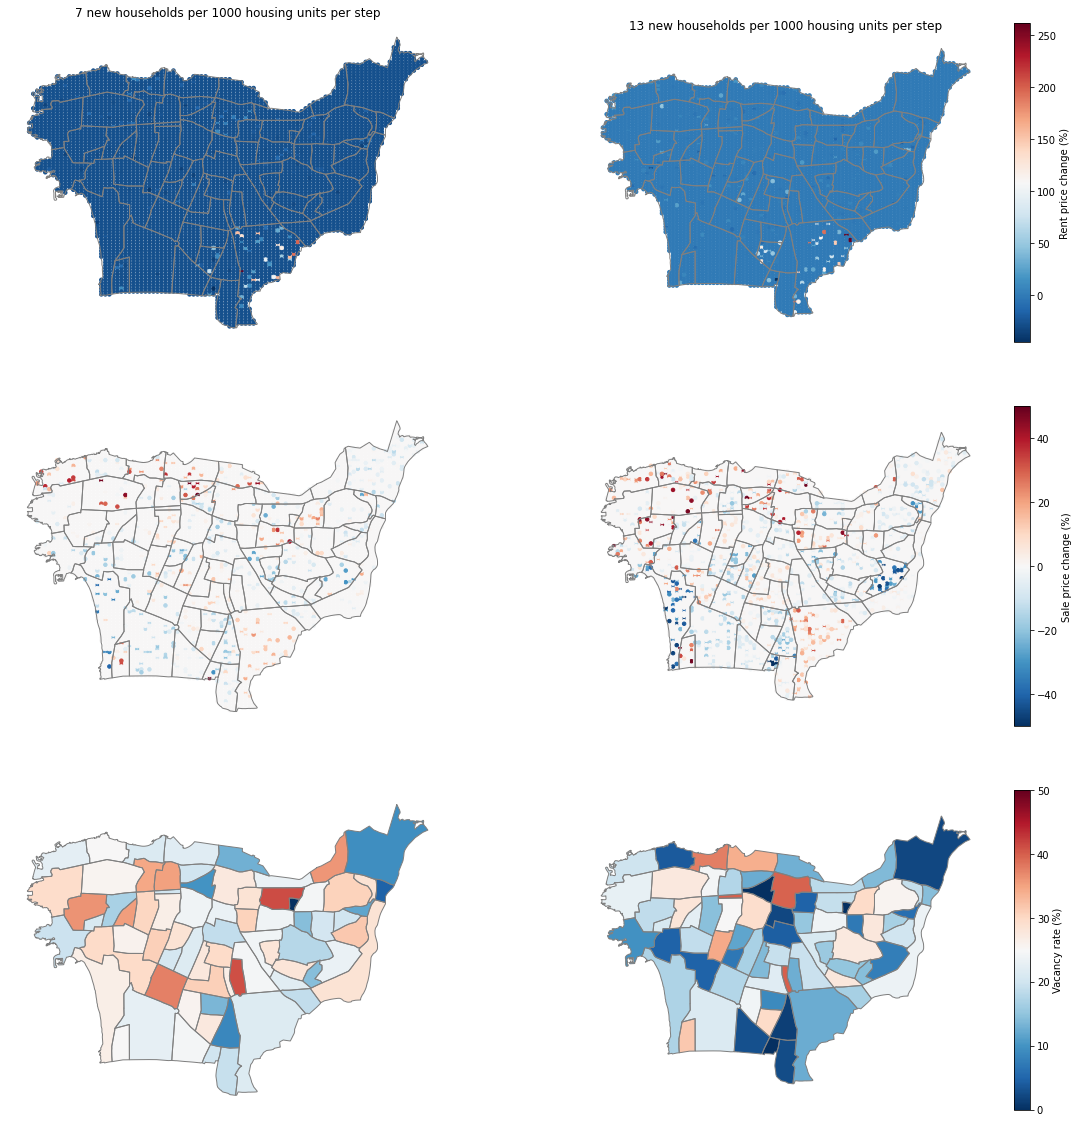

In [14]:
boundaries = gpd.read_file('../../neighbourhoods_clean.geojson')


fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# add titles
axs[0, 0].set_title('7 new households per 1000 housing units per step')
axs[0, 1].set_title('13 new households per 1000 housing units per step')

## with 0% vacancy tax
ownership_0.plot(column='rent delta', 
                 ax=axs[0, 0],
                 legend=False,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Rent price change (%)",},
)

ownership_0.plot(column='sale delta', 
                 ax=axs[1, 0],
                 legend=False,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Sale price change (%)",},
                 vmin=-50,
                 vmax=50,
)
neighbourhoods_0.plot(column='vacancy rate',
                      ax=axs[2, 0],
                      legend=False,
                      cmap='RdBu_r', 
                      legend_kwds={'label': "Vacancy rate (%)",},
                      vmin=0,
                      vmax=50,
)


### with 2% vacancy tax
ownership_2.plot(column='rent delta', 
                 ax=axs[0, 1],
                 legend=True,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Rent price change (%)",},
)

ownership_2.plot(column='sale delta', 
                 ax=axs[1, 1],
                 legend=True,
                 cmap='RdBu_r', 
                 marker='o',
                 markersize=12,
                 legend_kwds={'label': "Sale price change (%)",},
                 vmin=-50,
                 vmax=50,
)
neighbourhoods_2.plot(column='vacancy rate',
                      ax=axs[2, 1],
                      legend=True,
                      cmap='RdBu_r', 
                      legend_kwds={'label': "Vacancy rate (%)",},
                      vmin=0,
                      vmax=50,
)
#axs[2, 0].set_clim(0, 60)
#plt.set_clim(0, 60)

for ax_row in axs:
    for ax in ax_row:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(frame_on=False)
        boundaries.plot(ax=ax, facecolor="none", edgecolor="#808080")
